In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
train_dir = '/content/drive/MyDrive/Human Pose Estimation/dataset'

In [ ]:
class_name=[]
for file in os.listdir(train_dir):
    class_name+=[file]
print(class_name)
print(len(class_name))

['tittibhasana', 'anantasana', 'chakravakasana', 'parighasana', 'eka pada rajakapotasana ii', 'ashtanga namaskara', 'kapotasana', 'marichyasana i', 'janu sirsasana', 'hanumanasana', 'phalakasana', 'ananda balasana', 'krounchasana', 'adho mukha svanasana', 'yoganidrasana', 'kurmasana', 'vajrasana', 'garbha pindasana', 'padmasana', 'eka pada koundinyanasana i', 'simhasana', 'parivrtta trikonasana', 'upavistha konasana', 'ardha pincha mayurasana', 'supta virasana', 'virabhadrasana i', 'salamba bhujangasana', 'lolasana', 'tolasana', 'supta baddha konasana', 'ardha bhekasana', 'chaturanga dandasana', 'uttanasana', 'eka pada koundinyanasana ii', 'malasana', 'virasana', 'urdhva mukha svanasana', 'tadasana', 'durvasasana', 'camatkarasana', 'dandasana', 'tulasana', 'natarajasana', 'utthita hasta padangustasana', 'parsva bakasana', 'baddha konasana', 'bhekasana', 'marichyasana iii', 'matsyasana', 'ustrasana', 'vasisthasana', 'bhujangasana', 'sukhasana', 'makarasana', 'purvottanasana', 'utkatasan

In [ ]:
N=[]
for i in range(len(class_name)):
    N+=[i]
    
normal_mapping=dict(zip(class_name,N)) 
reverse_mapping=dict(zip(N,class_name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
dataset = []
testset=[]
count = 0
for file in os.listdir(train_dir):
  t = 0
  path = os.path.join(train_dir,file)   # path = /content/drive/MyDrive/Human Pose Estimation/dataset/class_name
  for im in os.listdir(path):
      image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
      image=img_to_array(image)
      image=image/255.0
      if t<60:
        dataset += [[image,count]]
      else:
        testset += [[image, count]]
      t+=1
  
  count = count + 1

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
data, labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [ ]:
print(labels0)
labels1 = to_categorical(labels0)   # Converts a class vector (integers) to binary class matrix.
labels = np.array(labels1) 
print('labels1: ',labels1)
print('labels: ',labels)


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

In [ ]:
data = np.array(data)
test = np.array(test)

- test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.
- shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.
- stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
- random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.

In [ ]:
trainx, testx, trainy, testy = train_test_split(data, labels , test_size = 0.2, random_state=44 )
# x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4495, 40, 40, 3)
(1124, 40, 40, 3)
(4495, 107)
(1124, 107)


# 이미지 전처리

### ImageDataGenerator 클래스 : 실시간 데이터 증강을 사용해서 텐서 이미지 데이터 배치를 생성

- horizontal_flip: 불리언. 인풋을 무작위로 가로로 뒤집습니다.
- vertical_flip: 불리언. 인풋을 무작위로 세로로 뒤집습니다.
- rotation_range: 정수. 무작위 회전의 각도 범위입니다.
- zoom_range: 부동소수점 혹은 [하한, 상산]. 무작위 줌의 범위입니다. 부동소수점인 경우, [하한, 상한] = [1-zoom_range, 1+zoom_range]입니다.
- width_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수
부동소수점: < 1인 경우 전체 가로넓이에서의 비율, >= 1인 경우 픽셀의 개수입니다.
1D 형태의 유사배열: 배열에서 가져온 무작위 요소입니다.
정수: (-width_shift_range, +width_shift_range) 사이 구간의 픽셀 개수입니다.
width_shift_range=2인 경우 유효값은 정수인 [-1, 0, +1]로, width_shift_range=[-1, 0, +1]와 동일한 반면, width_shift_range=1.0인 경우 유효값은 [-1.0, +1.0[의 반개구간 사이 부동소수점입니다.
- height_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수
부동소수점: < 1인 경우 전체 세로높이에서의 비율, >= 1인 경우 픽셀의 개수입니다.
1D 형태의 유사배열: 배열에서 가져온 무작위 요소입니다.
정수: (-height_shift_range, +height_shift_range) 사이 구간의 픽셀 개수입니다.
height_shift_range=2인 경우 유효한 값은 정수인 [-1, 0, +1]으로 height_shift_range=[-1, 0, +1]와 동일한 반면, height_shift_range=1.0인 경우 유효한 값은 [-1.0, +1.0[의 반개구간 사이 부동소수점입니다.
- shear_range: 부동소수점. 층밀리기의 강도입니다. (도 단위의 반시계 방향 층밀리기 각도)
- fill_mode: {"constant", "nearest", "reflect" 혹은 "wrap"} 중 하나. 디폴트 값은 'nearest'입니다. 인풋 경계의 바깥 공간은 다음의 모드에 따라 다르게 채워집니다:
'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
'nearest': aaaaaaaa|abcd|dddddddd
'reflect': abcddcba|abcd|dcbaabcd
'wrap': abcdabcd|abcd|abcdabcd

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                             width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model3.trainalbe = False

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
ouputs3 = tf.keras.layers.Dense(107, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=ouputs3)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
his = model.fit(data_generator.flow(trainx,trainy, batch_size=32), validation_data = (testx, testy), epochs=30)

Epoch 1/30
141/141 [==============================] - 273s 2s/step - loss: 4.7049 - accuracy: 0.0096 - val_loss: 4.6765 - val_accuracy: 0.0080
Epoch 2/30
141/141 [==============================] - 252s 2s/step - loss: 4.6540 - accuracy: 0.0100 - val_loss: 4.7008 - val_accuracy: 0.0160
Epoch 3/30
141/141 [==============================] - 255s 2s/step - loss: 4.6194 - accuracy: 0.0133 - val_loss: 4.6128 - val_accuracy: 0.0089
Epoch 4/30
141/141 [==============================] - 250s 2s/step - loss: 4.6052 - accuracy: 0.0133 - val_loss: 4.6717 - val_accuracy: 0.0036
Epoch 5/30
141/141 [==============================] - 251s 2s/step - loss: 4.6178 - accuracy: 0.0165 - val_loss: 5.0282 - val_accuracy: 0.0098
Epoch 6/30
141/141 [==============================] - 253s 2s/step - loss: 4.5978 - accuracy: 0.0147 - val_loss: 4.7304 - val_accuracy: 0.0062
Epoch 7/30
141/141 [==============================] - 251s 2s/step - loss: 4.6089 - accuracy: 0.0174 - val_loss: 4.6276 - val_accuracy: 0.0062

### classification_report
- precision: 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율이 된다.
- recall: 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다
- f1-score: 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다

- macro: 단순평균

- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균

- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.

In [ ]:
y_pred = model.predict(testx)
pred=np.argmax(y_pred, axis = 1)
ground = np.argmax(testy, axis=1)
print(classification_report(ground, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         9
           2       0.05      0.44      0.09         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00         9
          13       0.25      0.08      0.12        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         8
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


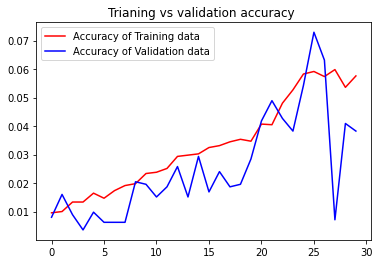

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_accuracy']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Trianing vs validation accuracy ')
plt.legend(loc=0)
plt.figure()
plt.show()

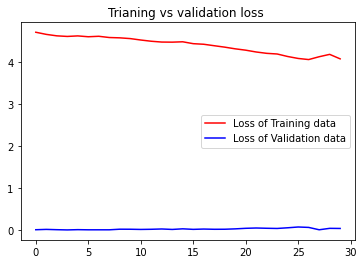

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Trianing vs validation loss ')
plt.legend(loc=0)
plt.figure()
plt.show()

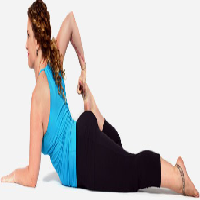

In [ ]:
path0="/content/drive/MyDrive/Human Pose Estimation/dataset/ardha bhekasana/13-0.png"
load_img(path0, target_size=(200,200))

In [ ]:
image = load_img(path0, target_size=(40,40))

image = img_to_array(image)
image = image/255.0
prediction_image=np.array(image)
prediction_image = np.expand_dims(image, axis = 0)


In [ ]:
prediction = model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is astavakrasana.


In [ ]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
  value2=np.argmax(item)
  PRED+=[value2]

(383, 40, 40, 3)
(383, 107)


In [ ]:
ANS=testlabels0

In [ ]:
accuracy=accuracy_score

0.09138381201044386
